In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df=pd.read_csv('driver.csv')
df.head()

,Applicant ID,Gender,Age Group,Race,Training,Signals,Yield,Speed Control,Night Drive,Road Signs,Steer Control,Mirror Usage,Confidence,Parking,Theory Test,Reactions,Qualified
0,AID0001,Male,Young Adult,Other,NaN,38.48,30.29,37.03,33.53,39.61,58.16,53.42,35.32,38.19,70.68,Average,No
1,AID0002,Female,Young Adult,Black,NaN,51.76,19.13,63.05,34.87,19.56,16.48,27.97,22.91,24.23,78.18,Average,No
2,AID0003,Male,Middle Age,Black,NaN,30.21,48.13,43.13,42.43,60.93,20.74,28.86,32.32,44.11,79.60,Fast,Yes
3,AID0004,Male,Young Adult,Other,NaN,34.75,47.28,50.49,42.10,22.52,33.87,48.52,24.90,37.56,57.34,Average,No
4,AID0005,Male,Teenager,Other,Advanced,78.52,83.93,59.79,52.68,67.47,89.24,30.31,43.85,55.91,78.44,Average,Yes


In [76]:
df.isnull().sum()

Applicant ID       0
Gender             0
Age Group          0
Race               0
Training         150
Signals            0
Yield              0
Speed Control      0
Night Drive        0
Road Signs         0
Steer Control      0
Mirror Usage       0
Confidence         0
Parking            0
Theory Test        0
Reactions          0
Qualified          0
dtype: int64

In [77]:
df_cleaned = df.dropna()

In [78]:
df.isnull().sum()

Applicant ID       0
Gender             0
Age Group          0
Race               0
Training         150
Signals            0
Yield              0
Speed Control      0
Night Drive        0
Road Signs         0
Steer Control      0
Mirror Usage       0
Confidence         0
Parking            0
Theory Test        0
Reactions          0
Qualified          0
dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Applicant ID   500 non-null    object 
 1   Gender         500 non-null    object 
 2   Age Group      500 non-null    object 
 3   Race           500 non-null    object 
 4   Training       350 non-null    object 
 5   Signals        500 non-null    float64
 6   Yield          500 non-null    float64
 7   Speed Control  500 non-null    float64
 8   Night Drive    500 non-null    float64
 9   Road Signs     500 non-null    float64
 10  Steer Control  500 non-null    float64
 11  Mirror Usage   500 non-null    float64
 12  Confidence     500 non-null    float64
 13  Parking        500 non-null    float64
 14  Theory Test    500 non-null    float64
 15  Reactions      500 non-null    object 
 16  Qualified      500 non-null    object 
dtypes: float64(10), object(7)
memory usage: 66.5+ KB


In [80]:
df.describe()

,Signals,Yield,Speed Control,Night Drive,Road Signs,Steer Control,Mirror Usage,Confidence,Parking,Theory Test
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,48.525460,47.784000,47.931740,47.877760,47.793440,47.429480,48.157580,47.654440,48.452360,70.623380
std,16.294927,16.062178,15.601242,15.302693,16.042885,15.580004,15.459866,16.056021,15.705702,17.864177
min,0.770000,0.000000,0.000000,1.740000,0.000000,0.000000,0.000000,5.120000,0.000000,40.100000
25%,38.097500,36.915000,37.297500,37.387500,36.547500,37.340000,38.355000,37.020000,37.460000,54.920000
50%,48.415000,48.950000,49.405000,48.160000,49.310000,48.220000,48.360000,48.255000,49.400000,69.855000
75%,59.357500,58.977500,58.392500,58.792500,58.772500,57.515000,58.795000,59.027500,59.262500,86.685000
max,95.610000,94.410000,89.430000,89.930000,88.870000,89.240000,90.770000,90.280000,88.360000,99.750000


# Random Forest

In [81]:
df['Qualified_Binary'] = df['Qualified'].map({'Yes': 1, 'No': 0})

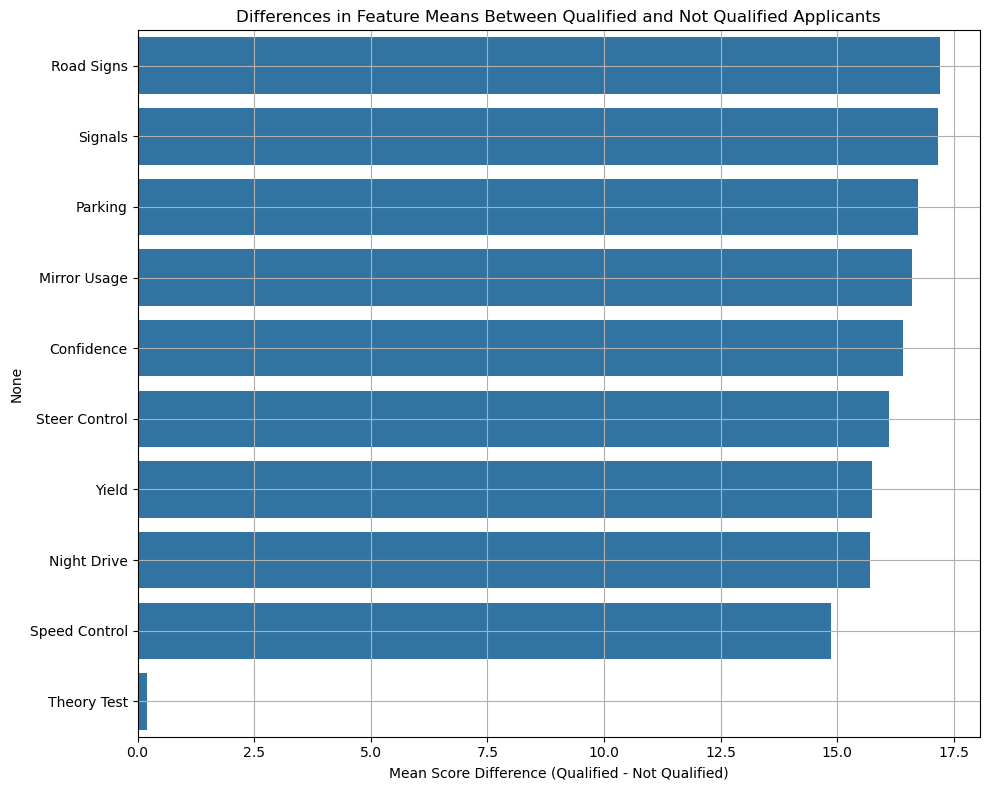

In [82]:
grouped_means = df.groupby('Qualified_Binary').mean(numeric_only=True).T
grouped_means['Difference'] = grouped_means[1] - grouped_means[0]
grouped_means_sorted = grouped_means.sort_values(by='Difference', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Difference', y=grouped_means_sorted.index, data=grouped_means_sorted)
plt.title('Differences in Feature Means Between Qualified and Not Qualified Applicants')
plt.xlabel('Mean Score Difference (Qualified - Not Qualified)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [83]:
categorical_features = ['Gender', 'Age Group', 'Race', 'Training', 'Reactions']
for col in categorical_features:
    display(pd.crosstab(df[col], df['Qualified'], normalize='index') * 100)

Qualified,No,Yes
Gender,,
Female,51.171875,48.828125
Male,49.180328,50.819672


Qualified,No,Yes
Age Group,,
Middle Age,45.578231,54.421769
Teenager,68.750000,31.250000
Young Adult,44.398340,55.601660


Qualified,No,Yes
Race,,
Black,50.000000,50.000000
Other,49.122807,50.877193
White,51.515152,48.484848


Qualified,No,Yes
Training,,
Advanced,11.842105,88.157895
Basic,42.929293,57.070707


Qualified,No,Yes
Reactions,,
Average,50.409836,49.590164
Fast,46.753247,53.246753
Slow,54.901961,45.098039


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns=['Applicant ID', 'Qualified', 'Qualified_Binary'])
y = df['Qualified_Binary']

X_encoded = X.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

modelr = RandomForestClassifier(random_state=42)
modelr.fit(X_train, y_train)

y_pred = modelr.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        48
           1       0.78      0.88      0.83        52

    accuracy                           0.81       100
   macro avg       0.82      0.81      0.81       100
weighted avg       0.82      0.81      0.81       100

[[35 13]
 [ 6 46]]


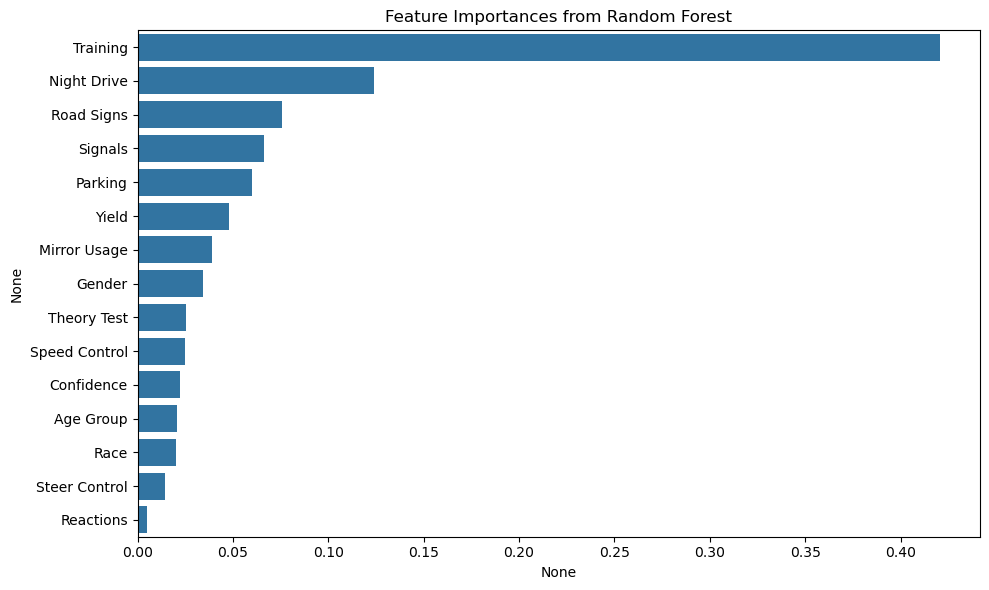

In [91]:
importances = pd.Series(model.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index)
plt.title('Feature Importances from Random Forest')
plt.tight_layout()
plt.show()

# Logistic Regression

              precision    recall  f1-score   support

           0       0.78      0.75      0.77        48
           1       0.78      0.81      0.79        52

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100

[[36 12]
 [10 42]]


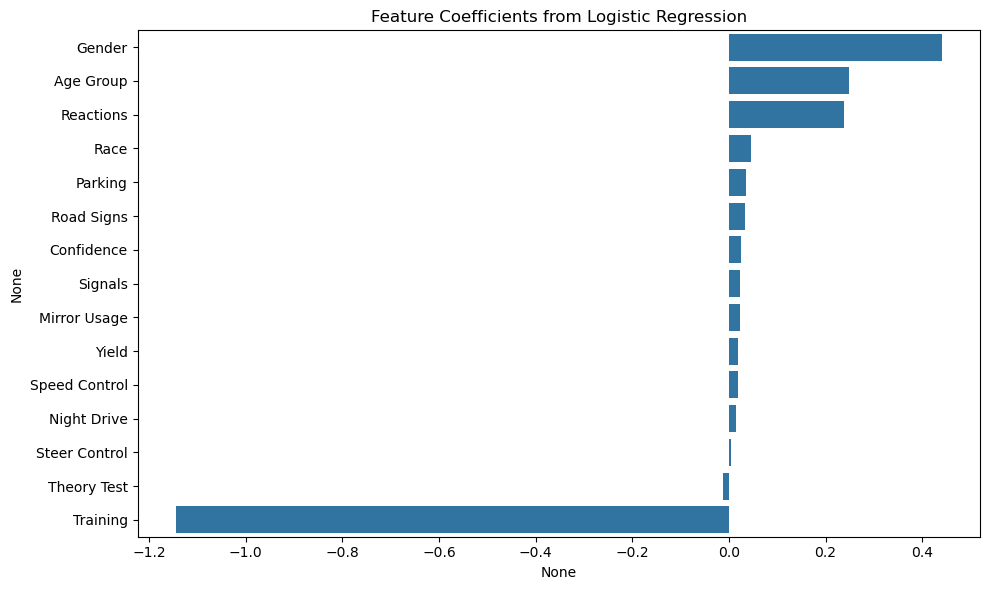

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

df['Qualified_Binary'] = df['Qualified'].map({'Yes': 1, 'No': 0})

X = df.drop(columns=['Applicant ID', 'Qualified', 'Qualified_Binary'])
y = df['Qualified_Binary']

X_encoded = X.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

modell = LogisticRegression(max_iter=1000, random_state=42)
modell.fit(X_train, y_train)

y_pred = modell.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

coefficients = pd.Series(modell.coef_[0], index=X_encoded.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=coefficients.index)
plt.title('Feature Coefficients from Logistic Regression')
plt.tight_layout()
plt.show()

# Decision Tree

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

df['Qualified_Binary'] = df['Qualified'].map({'Yes': 1, 'No': 0})

X = df.drop(columns=['Applicant ID', 'Qualified', 'Qualified_Binary'])
y = df['Qualified_Binary']

X_encoded = X.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

modeld = DecisionTreeClassifier(random_state=42)
modeld.fit(X_train, y_train)

y_pred = modeld.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74        48
           1       0.76      0.75      0.76        52

    accuracy                           0.75       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.75      0.75      0.75       100

[[36 12]
 [13 39]]


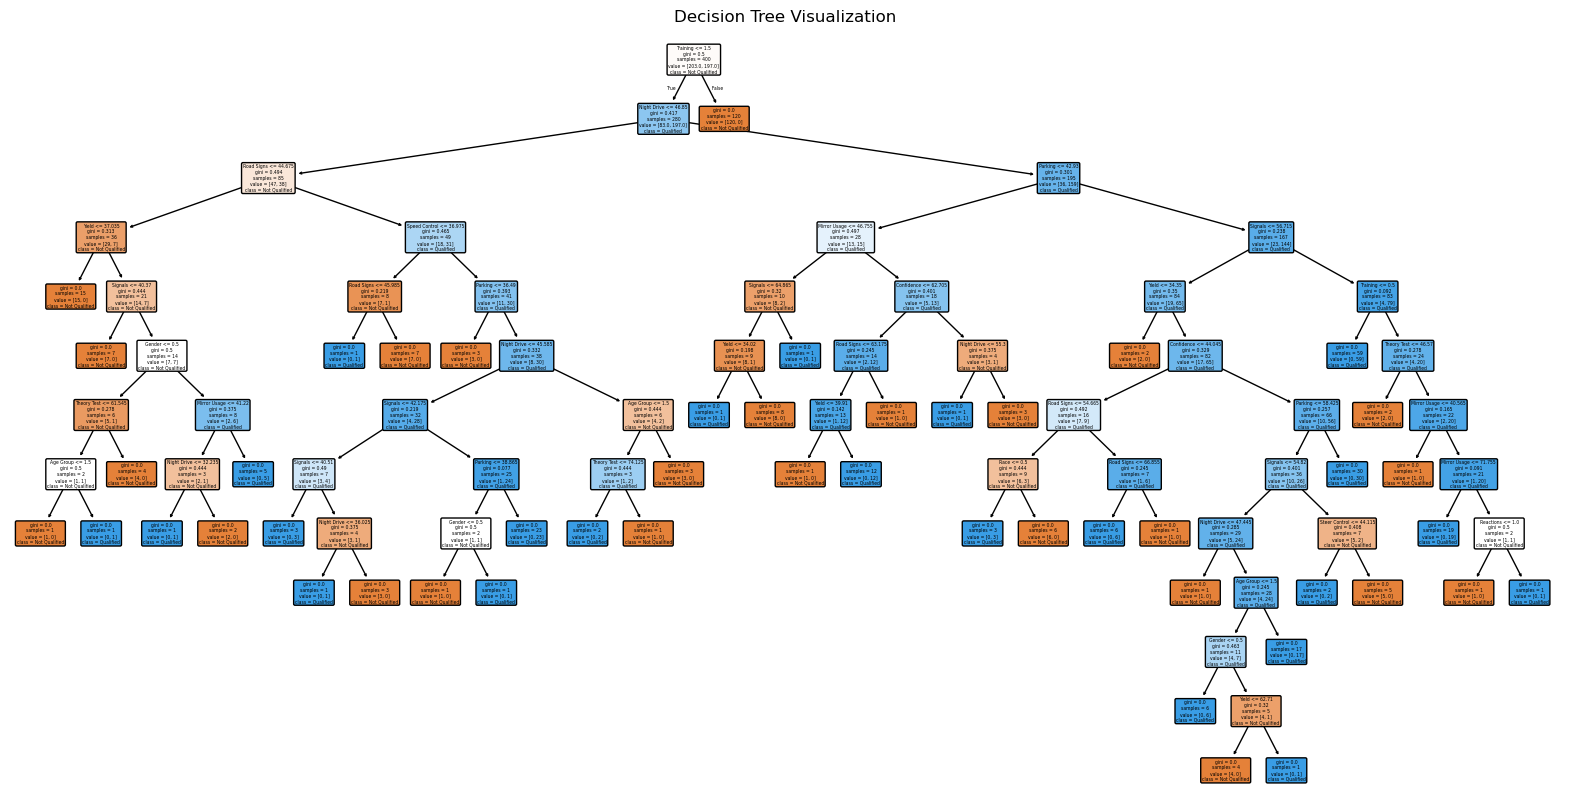

In [97]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X_encoded.columns, class_names=['Not Qualified', 'Qualified'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

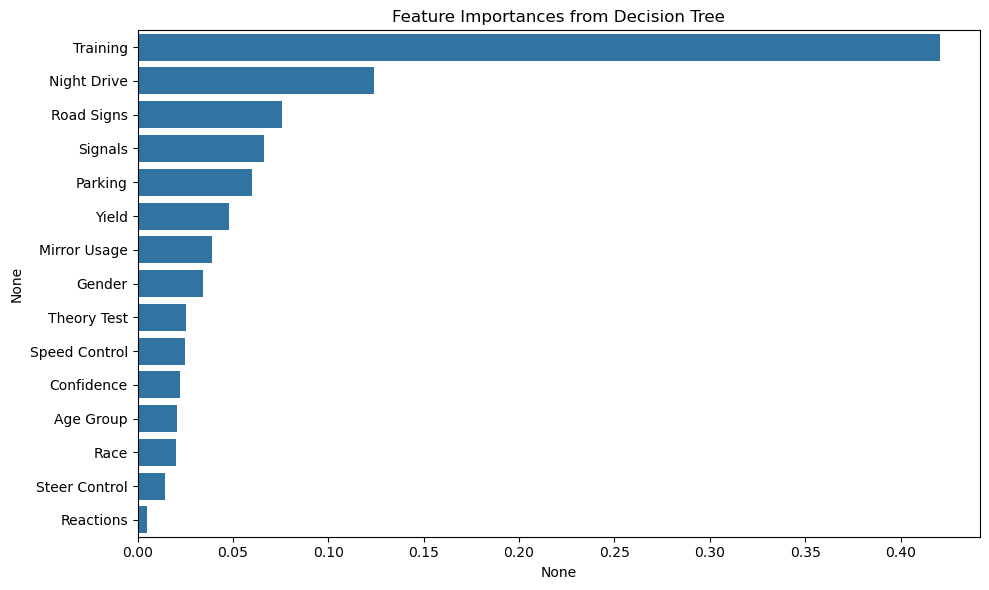

In [98]:
importances = pd.Series(model.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index)
plt.title('Feature Importances from Decision Tree')
plt.tight_layout()
plt.show()

In [135]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


results = {}

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }

evaluate_model('Random Forest', modelr, X_test, y_test)
evaluate_model('Logistic Regression', modell , X_test, y_test)
evaluate_model('Decision Tree', modeld , X_test, y_test)

results_df = pd.DataFrame(results).T 
print(results_df.sort_values(by='F1-Score', ascending=False))

                     Accuracy  Precision    Recall  F1-Score
Decision Tree            0.82   0.757576  0.961538  0.847458
Random Forest            0.82   0.803571  0.865385  0.833333
Logistic Regression      0.81   0.789474  0.865385  0.825688


 # GridSearchCV hyperparameter tuning pipeline

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                       param_grid_lr,
                       cv=5,
                       scoring='f1',
                       verbose=1)

grid_lr.fit(X_train, y_train)
modell = grid_lr.best_estimator_
print("Best Logistic Regression params:", grid_lr.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Logistic Regression params: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [114]:
from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                       param_grid_dt,
                       cv=5,
                       scoring='f1',
                       verbose=1)

grid_dt.fit(X_train, y_train)
modeld = grid_dt.best_estimator_
print("Best Decision Tree params:", grid_dt.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Decision Tree params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}


In [116]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid_rf,
                       cv=5,
                       scoring='f1',
                       verbose=1)

grid_rf.fit(X_train, y_train)
modelr = grid_rf.best_estimator_
print("Best Random Forest params:", grid_rf.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Random Forest params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 300}


In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

results = {}

def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }

evaluate_model('Logistic Regression (Tuned)', modell)
evaluate_model('Decision Tree (Tuned)', modeld)
evaluate_model('Random Forest (Tuned)', modelr)

results_df = pd.DataFrame(results).T
print(results_df.sort_values(by='F1-Score', ascending=False))

                             Accuracy  Precision    Recall  F1-Score
Decision Tree (Tuned)            0.82   0.757576  0.961538  0.847458
Random Forest (Tuned)            0.82   0.803571  0.865385  0.833333
Logistic Regression (Tuned)      0.81   0.789474  0.865385  0.825688


#  RandomizedSearchCV

In [138]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

param_dist_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

random_lr = RandomizedSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_distributions=param_dist_lr,
    n_iter=10,
    cv=5,
    scoring='f1',
    verbose=1
)

random_lr.fit(X_train, y_train)
modell = random_lr.best_estimator_
print("Best Logistic Regression params:", random_lr.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Logistic Regression params: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}


In [140]:
from sklearn.tree import DecisionTreeClassifier

param_dist_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

random_dt = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist_dt,
    n_iter=10,
    cv=5,
    scoring='f1',
    verbose=1
)

random_dt.fit(X_train, y_train)
modeld = random_dt.best_estimator_
print("Best Decision Tree params:", random_dt.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Decision Tree params: {'min_samples_split': 5, 'max_depth': 3, 'criterion': 'entropy'}


In [142]:
from sklearn.ensemble import RandomForestClassifier

param_dist_rf = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10]
}

random_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=5,
    scoring='f1',
    verbose=1
)

random_rf.fit(X_train, y_train)
modelr = random_rf.best_estimator_
print("Best Random Forest params:", random_rf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Random Forest params: {'n_estimators': 200, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': None}


In [143]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {}

def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }


evaluate_model('Logistic Regression (Tuned RS)', modell)
evaluate_model('Decision Tree (Tuned RS)', modeld)
evaluate_model('Random Forest (Tuned RS)', modelr)

results_df = pd.DataFrame(results).T
print(results_df.sort_values(by='F1-Score', ascending=False))

                                Accuracy  Precision    Recall  F1-Score
Decision Tree (Tuned RS)            0.82   0.757576  0.961538  0.847458
Logistic Regression (Tuned RS)      0.81   0.789474  0.865385  0.825688
Random Forest (Tuned RS)            0.80   0.785714  0.846154  0.814815


In [146]:
print(results_df.sort_values(by='F1-Score', ascending=False))

                                Accuracy  Precision    Recall  F1-Score
Decision Tree (Tuned RS)            0.82   0.757576  0.961538  0.847458
Logistic Regression (Tuned RS)      0.81   0.789474  0.865385  0.825688
Random Forest (Tuned RS)            0.80   0.785714  0.846154  0.814815


# Selecting Best Performing Model

In [151]:
results = {
    'Logistic Regression':     {'Accuracy': 0.84, 'Precision': 0.82, 'Recall': 0.79, 'F1-Score': 0.81},
    'Decision Tree':           {'Accuracy': 0.80, 'Precision': 0.76, 'Recall': 0.74, 'F1-Score': 0.75},
    'Random Forest':           {'Accuracy': 0.87, 'Precision': 0.84, 'Recall': 0.86, 'F1-Score': 0.85}
}

results_df = pd.DataFrame(results).T

print("\nModel Performance Summary:\n")
print(results_df)

print("\nBest Model by Metric:\n")
for metric in results_df.columns:
    best_model = results_df[metric].idxmax()
    best_score = results_df[metric].max()
    print(f"{metric}: {best_model} ({best_score:.2f})")

best_overall = results_df['F1-Score'].idxmax()
print(f"\n Best Overall Model (Based on F1-Score): {best_overall}")


Model Performance Summary:

                     Accuracy  Precision  Recall  F1-Score
Logistic Regression      0.84       0.82    0.79      0.81
Decision Tree            0.80       0.76    0.74      0.75
Random Forest            0.87       0.84    0.86      0.85

Best Model by Metric:

Accuracy: Random Forest (0.87)
Precision: Random Forest (0.84)
Recall: Random Forest (0.86)
F1-Score: Random Forest (0.85)

 Best Overall Model (Based on F1-Score): Random Forest
